In [2]:

%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
import requests
import shutil

import numpy as np

# Load data from url
# Copy the file content from url to local tmp.npy file 
# then load the numpy data and return
def load_from_url(url):
  resp = requests.get(url, stream=True)
  
  with open('tmp.npy', 'wb') as f:
    shutil.copyfileobj(resp.raw, f)
   
  var = np.load('tmp.npy')
  
  return var
#인풋 데이터 datin 변수에 로드, 아웃풋 데이터는 target 변수에 로드

datin = load_from_url('https://github.com/geonhong/mlcfd/blob/master/volfrac/samples/volfrac_data.npy?raw=true')
target = load_from_url('https://github.com/geonhong/mlcfd/blob/master/volfrac/samples/volfrac_target.npy?raw=true')

print(datin.shape)
print(target.shape)



(175, 64)
(175,)


In [57]:
dataset = datin
targets = target

print(dataset.shape)
print(targets.shape)

# Shuffle data and generate train/test data set
# 80% of dataset is used to train the model and
# the rest 20% is used to test
index = np.arange(len(dataset))
np.random.shuffle(index)

train_data = []
train_targ = []

test_data = []
test_targ = []

i = 0
ntrain = 0.8*len(dataset)

for itrg in index:
  if i<ntrain:
    train_data.append(dataset[itrg])
    train_targ.append(targets[itrg])
  else:
    test_data.append(dataset[itrg])
    test_targ.append(targets[itrg])

  i += 1

train_data = np.array(train_data)
train_targ = np.array(train_targ)

test_data = np.array(test_data)
test_targ = np.array(test_targ)

# 8*8 데이터로 변경
train_data = train_data.reshape(-1,8,8)
test_data = test_data.reshape(-1, 8, 8)


print("train data shape: ", train_data.shape)
print("train target shape: ", train_targ.shape)
print("test data shape: ", test_data.shape)
print("test target shape: ", test_targ.shape)

(175, 64)
(175,)
train data shape:  (140, 8, 8)
train target shape:  (140,)
test data shape:  (35, 8, 8)
test target shape:  (35,)


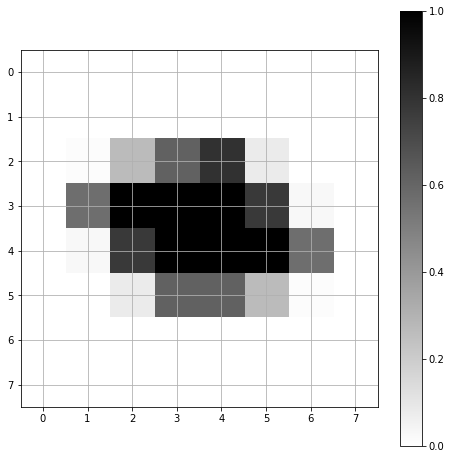

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,8))
plt.imshow(train_data[0],cmap = plt.cm.binary)
plt.colorbar()
plt.grid(True)
plt.show()

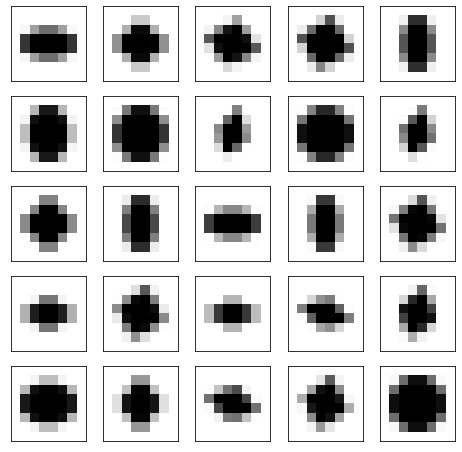

In [45]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
plt.show()

In [79]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(1, (2, 2), padding='same', activation ='relu', input_shape=(8,8,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(1, (2, 2), padding='same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 8, 8, 1)           5         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 4, 4, 1)           0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 4, 4, 1)           5         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 2, 2, 1)           0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 4)                 0         
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 9         
Total para

In [1]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

NameError: name 'model' is not defined

In [77]:
train_data = train_data.reshape(-1,8,8,1)
test_data = test_data.reshape(-1,8,8,1)

model.fit(train_data, train_targ, epochs=5)

Epoch 1/5
140/140 [==============================] - 0s 2ms/step - loss: 1.0441 - acc: 0.0000e+00
Epoch 2/5
140/140 [==============================] - 0s 79us/step - loss: 1.0441 - acc: 0.0000e+00
Epoch 3/5
140/140 [==============================] - 0s 86us/step - loss: 1.0441 - acc: 0.0000e+00
Epoch 4/5
140/140 [==============================] - 0s 86us/step - loss: 1.0441 - acc: 0.0000e+00
Epoch 5/5
140/140 [==============================] - 0s 79us/step - loss: 1.0441 - acc: 0.0000e+00


In [70]:
test_loss, test_acc = model.evaluate(test_data, test_targ)

print('테스트 정확도:', test_acc)

35/35 [==============================] - 0s 86us/step
테스트 정확도: 0.0


In [62]:
print(test_targ)

['2.507920348681866' '0.247964152281062' '2.3293419782992917'
 '1.245562216057079' '2.8472016250979677' '1.5493126753214095'
 '2.1916854300281043' '2.6487234242518705' '2.6011418174454723'
 '1.1009129535718778' '1.6394218341903175' '0.5460979324352006'
 '1.3627592476562012' '2.4550865729574864' '0.2126918943935795'
 '0.703356054598871' '2.57021692545422' '1.968509964979775'
 '1.5626546513003206' '1.1199610001365077' '0.2955585974039108'
 '2.1133330774668684' '1.33654276580396' '2.676408883826148'
 '0.6732316010012845' '2.3873454147557687' '1.3072735447353643'
 '2.4979940772720965' '1.7982537257936502' '1.2093312690382787'
 '0.6206349570674129' '2.1971342173261545' '0.4056805383831987'
 '1.5985263035345172' '0.5329735841486027']
